<a href="https://colab.research.google.com/github/mwwi/avenido-exam-writeup/blob/main/write_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing 2500 images...
Total Serial Processing Time for all images: 303578.67 milliseconds
Total Parallel Processing Time for all images: 416974.28 milliseconds
Speedup: 0.73


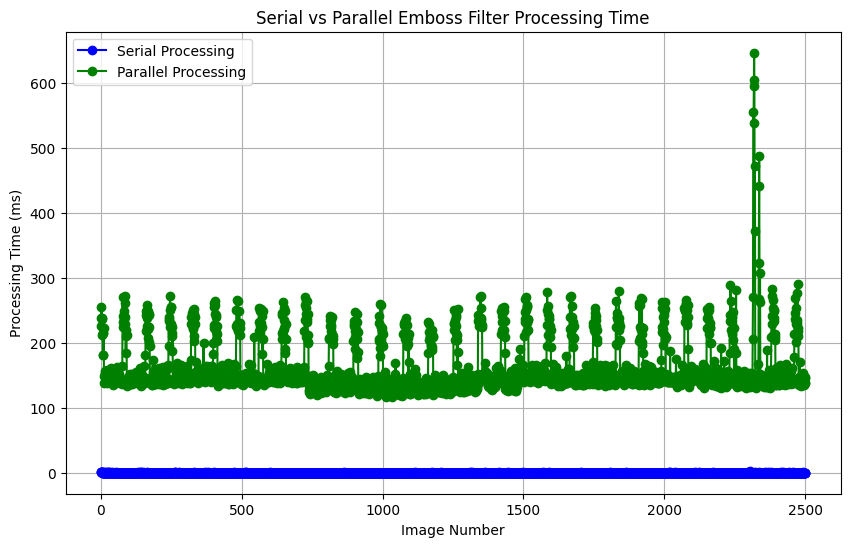

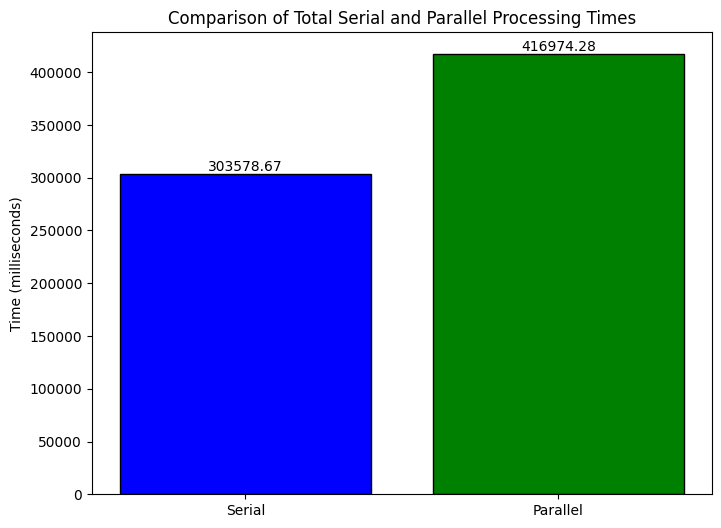

In [ ]:
# Emboss
from multiprocessing import Pool
import time
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Emboss filter function
def apply_emboss(part):
    # Emboss kernel
    kernel = np.array([[ -2, -1,  0],
                       [ -1,  1,  1],
                       [  0,  1,  2]])
    return cv2.filter2D(part, -1, kernel)

# Serial Processing
def serial_processing(image_files):
    serial_times = []
    total_start_time = time.time()

    for i, image_file in enumerate(image_files):
        image = cv2.imread(image_file, 0)  # Read the image in grayscale
        if image is None:
            print(f"Error loading image {image_file}")
            continue

        # Measure time for each image
        start_time = time.time()

        # Apply Emboss filter serially
        processed_image = apply_emboss(image)

        # Record time taken for this image
        elapsed_time = (time.time() - start_time) * 1000  # Convert to milliseconds
        serial_times.append(elapsed_time)

        # # Display the original and processed image
        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.imshow(image, cmap='gray')
        # plt.title(f"Original Image {i+1} (Serial)")
        # plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(processed_image, cmap='gray')
        # plt.title(f"Embossed Image {i+1} (Serial)")
        # plt.axis('off')

        # plt.show()

    total_elapsed_time = (time.time() - total_start_time) * 1000  # Convert to milliseconds
    print(f'Total Serial Processing Time for all images: {total_elapsed_time:.2f} milliseconds')
    return serial_times, total_elapsed_time

# Parallel Processing
def parallel_processing(image_files):
    parallel_times = []
    total_start_time = time.time()

    for i, image_file in enumerate(image_files):
        image = cv2.imread(image_file, 0)  # Read the image in grayscale
        if image is None:
            print(f"Error loading image {image_file}")
            continue

        # Split image into parts for parallel processing
        num_workers = 4
        split_image = np.array_split(image, num_workers)

        # Measure time for each image
        start_time = time.time()

        # Apply Emboss filter in parallel
        with Pool(num_workers) as pool:
            result = pool.map(apply_emboss, split_image)

        # Combine results
        processed_image = np.vstack(result)

        # Record time taken for this image
        elapsed_time = (time.time() - start_time) * 1000  # Convert to milliseconds
        parallel_times.append(elapsed_time)

        # # Display the original and processed image
        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.imshow(image, cmap='gray')
        # plt.title(f"Original Image {i+1} (Parallel)")
        # plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(processed_image, cmap='gray')
        # plt.title(f"Embossed Image {i+1} (Parallel)")
        # plt.axis('off')

        # plt.show()

    total_elapsed_time = (time.time() - total_start_time) * 1000  # Convert to milliseconds
    print(f'Total Parallel Processing Time for all images: {total_elapsed_time:.2f} milliseconds')
    return parallel_times, total_elapsed_time

# Load images from folder and select a subset to process
def load_images(image_folder, num_images):
    image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))]
    return image_files[:num_images]

# Main function to run serial and parallel processing
def main(image_folder, num_images):
    # Load images
    image_files = load_images(image_folder, num_images)

    if len(image_files) == 0:
        print("No images found in the directory.")
        return

    print(f"Processing {len(image_files)} images...")

    # Run serial processing and get the times for each image
    serial_times, total_serial_time = serial_processing(image_files)

    # Run parallel processing and get the times for each image
    parallel_times, total_parallel_time = parallel_processing(image_files)

    # Speedup calculation
    speedup = total_serial_time / total_parallel_time
    print(f'Speedup: {speedup:.2f}')

    # Plot image-by-image comparison of processing times
    images = range(1, len(image_files) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(images, serial_times, label='Serial Processing', marker='o', color='blue')
    plt.plot(images, parallel_times, label='Parallel Processing', marker='o', color='green')
    plt.xlabel('Image Number')
    plt.ylabel('Processing Time (ms)')
    plt.title('Serial vs Parallel Emboss Filter Processing Time')
    plt.legend()
    plt.grid(True)
    plt.show()

 # Bar chart comparing total serial and parallel processing times
    times = [total_serial_time, total_parallel_time]
    labels = ['Serial', 'Parallel']
    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, times, color=['blue', 'green'], edgecolor='black')

    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.ylabel('Time (milliseconds)')
    plt.title('Comparison of Total Serial and Parallel Processing Times')
    plt.show()

# Run the code
if __name__ == "__main__":
    image_folder = '/content/drive/MyDrive/Colab Notebooks/writeup/train'  # Change this to your image folder path
    num_images = 2500  # Number of images to process
    main(image_folder, num_images)



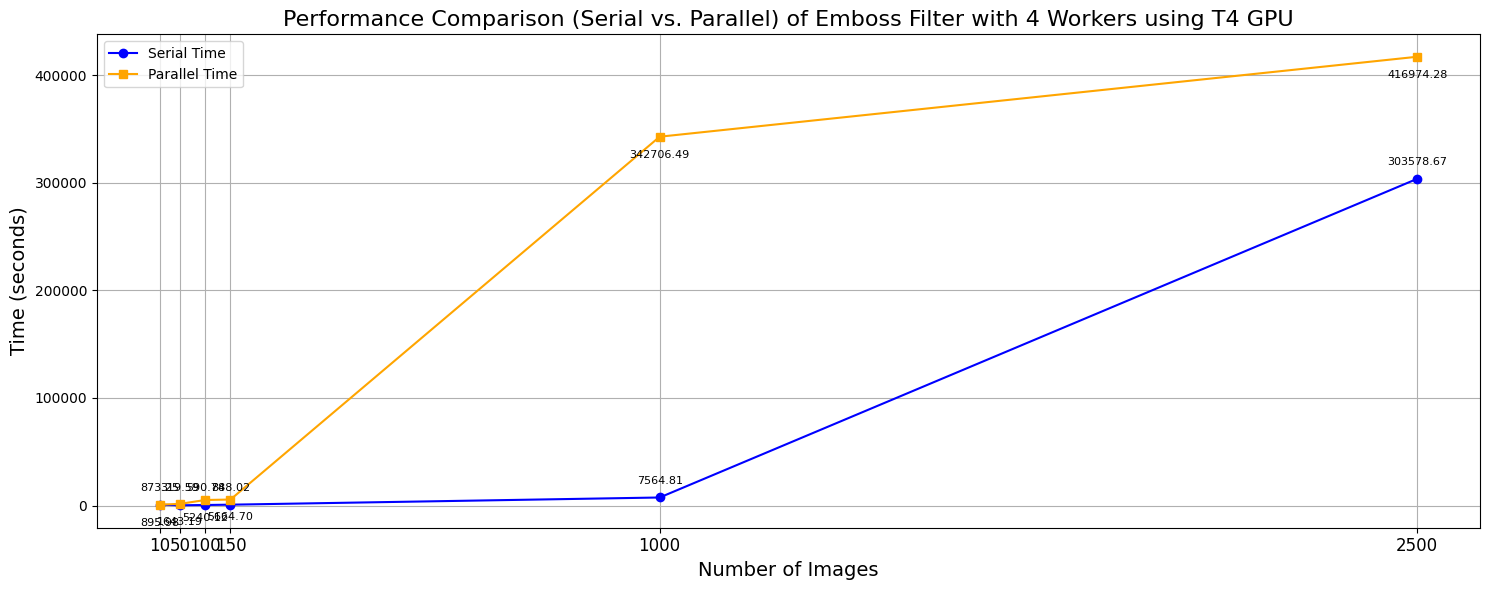

In [30]:
import matplotlib.pyplot as plt

# Updated Data
images = [10, 50, 100, 150, 1000, 2500]  # Added 150 based on your data
serial_time = [873.25, 319.59, 590.74, 888.02, 7564.81, 303578.67]
parallel_time = [895.98, 1643.19, 5240.12, 5664.70, 342706.49, 416974.28]

# Create the line graph
plt.figure(figsize=(15, 6))  # Use a reasonable figure width

plt.plot(images, serial_time, marker='o', markersize=6, label='Serial Time', color='blue')
plt.plot(images, parallel_time, marker='s', markersize=6, label='Parallel Time', color='orange')

# Annotate data points for Serial Time
for i, txt in enumerate(serial_time):
    plt.annotate(f'{txt:.2f}', (images[i], serial_time[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Annotate data points for Parallel Time
for i, txt in enumerate(parallel_time):
    plt.annotate(f'{txt:.2f}', (images[i], parallel_time[i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)

# Set labels and title
plt.xlabel('Number of Images', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Performance Comparison (Serial vs. Parallel) of Emboss Filter with 4 Workers using T4 GPU', fontsize=16)

# Set x-ticks to show all images and increase font size
plt.xticks(images, fontsize=12)

# Add legend
plt.legend()

# Show grid for better readability
plt.grid(True)
plt.tight_layout()
plt.show()
